In [147]:
import text
import ascii

from IPython.display import clear_output

import copy
import numpy as np
import random
import matplotlib.pyplot as plt

In [148]:
def encoding(file):
    input = open(file)

    for line in input:
        row = list(line)

        for index in range(len(row)):
            row[index] = ord(row[index])

            if row[index] == 32: row[index] = 27 # " "
            else: row[index] = row[index] - 96

    input.close()
    return row

In [149]:
def decoding(group):
    for index in range(len(group)):
        if group[index] == 27: group[index] = 32 # " "
        else: group[index] = group[index] + 96
        
        group[index] = chr(group[index])

    return group

- __Початкова модель__

In [150]:
language = "UKR: misto" # "UKR: misto", "ENG: 1984"

if language == "ENG: 1984":    
    alphabet = "abcdefghijklmnopqrstuvwxyz "
if language == "UKR: misto":    
    alphabet = "абвгдежзийклмнопрстуфхцчшщґїьєюяі '"

states = 2

random_mode = False # create B randomly or use once created matrix

if states == 2:
    A = np.array([[0.4, 0.6],
                  [0.6, 0.4]])

    m = [0.4, 0.6]

if states == 3:
    A = np.array([[0.4, 0.3, 0.3],
                  [0.3, 0.4, 0.3],
                  [0.3, 0.3, 0.4]])

    m = [0.3, 0.4, 0.3]

if states == 4:
    A = np.array([[0.3, 0.2, 0.2, 0.3],
                  [0.2, 0.3, 0.3, 0.2],
                  [0.3, 0.2, 0.2, 0.3],
                  [0.2, 0.3, 0.3, 0.2]])

    m = [0.2, 0.3, 0.2, 0.3]

In [151]:
# if random_mode == True/False

if random_mode == True:
    B = np.zeros((states,len(alphabet)))

    for i in range(len(B)):
        for j in range(len(B[0])):
            B[i][j] = 1/len(alphabet) + random.uniform(-0.001, 0.001)
            # B[i][j] = 1/len(alphabet)

    for i in range(len(B)):
        scaler = np.sum(B[i])
        for j in range(len(B[0])):
            B[i][j] = B[i][j]/scaler

    print("B = np.array([")
    for i in range(len(B)):
        print("[", end="")
        for j in range(len(B[i])):
            if j != len(B[i])-1:
                print(B[i][j], end=", ")
            if j == len(B[i])-1:
                if i != len(B)-1:
                    print(B[i][j], end="], ")
                if i == len(B)-1:
                    print(B[i][j], end="] ")
    print("\n])")

if random_mode == False:
    if states == 2:
        # nice variant of matrix B, states = 2
        B = np.array([
            [0.028609050654903195, 0.028642030745652074, 0.02859511814223507, 0.028512441373899647, 0.02862839526589915, 0.02861357316012459, 0.02849870082428287, 0.028620259096143148, 0.02865201419990382, 0.028546080385021266, 0.028617125031300882, 0.02849963184353835, 0.02863663027685744, 0.028619849350384162, 0.028602444769838718, 0.028529724084050783, 0.02854049106344783, 0.028607947587236674, 0.028496980205366142, 0.02851034344438277, 0.028580322403876243, 0.02853493237233685, 0.028640395555997743, 0.02858712596920717, 0.028472728528662176, 0.028585596244513317, 0.028660530534185588, 0.028504158454992854, 0.028462229032048463, 0.02857526629468959, 0.028573148813259886, 0.02855083879366215, 0.02863346572596231, 0.028511887149751933, 0.028548542622385126], 
            [0.02864770356829296, 0.02856402999448818, 0.028573445005880372, 0.028520382754065692, 0.02854777939996006, 0.028634276777609876, 0.028634233246932355, 0.028665456553517103, 0.028527405816200908, 0.02848900138113285, 0.02851761280463923, 0.028655886272778965, 0.028590968990618047, 0.028673588231158013, 0.028531803337214827, 0.028603347531408033, 0.02850183222141377, 0.028677118639957273, 0.028547301645400442, 0.02851473024361436, 0.02852946226468809, 0.028504890419849976, 0.028543844137756277, 0.028645534561601012, 0.02856359792172033, 0.028551591507527226, 0.028550669252878153, 0.028486524138638756, 0.0286612782819836, 0.028657806746660318, 0.028523768684669708, 0.028494117379174632, 0.028600246610920046, 0.028569959716456084, 0.02849880395919242] 
        ])
    if states == 3:
        # nice variant of matrix B, states = 3
        B = np.array([
            [0.028524881017855153, 0.035990316493524084, 0.019722130632599824, 0.024918975486897265, 0.024129090907342582, 0.03139988080532068, 0.023851705011999146, 0.029373608366847714, 0.0306544829044373, 0.03750417278882549, 0.02697227649003555, 0.019640831238122068, 0.02076762385455763, 0.03306575096569124, 0.036739150318573346, 0.019630639327340986, 0.03616828673307436, 0.022211556969822285, 0.021223499522721057, 0.030631071835598805, 0.03682579998874791, 0.024831501002942253, 0.023398520851457674, 0.029871803948346088, 0.019994215480734916, 0.031180374472066247, 0.0360364994168724, 0.037477999464773634, 0.02797881920711431, 0.03822970034741069, 0.02805313899258484, 0.03286360252786578, 0.024084512714263005, 0.03716678847315042, 0.01888679144048347], 
            [0.037534072508743854, 0.03719206836360441, 0.02299379304291576, 0.03550597525566512, 0.027370281644322935, 0.023301185377219414, 0.020333919786744318, 0.02747078202547273, 0.03603801889321494, 0.027751108158822587, 0.024729286878447245, 0.021140982505608263, 0.03368926748693902, 0.02247029186482099, 0.02905667958376697, 0.022590902985189162, 0.02180701572714701, 0.038107062693389614, 0.02247077882483432, 0.03647611640553063, 0.03609496888364478, 0.025108588240862303, 0.036990416747382515, 0.026280855343825696, 0.02997927048372103, 0.022555091216755793, 0.02645148942580847, 0.03824696902847217, 0.038883869400328445, 0.0319288083978353, 0.020215303758362488, 0.027012052631514072, 0.025485408191160352, 0.021183326788479947, 0.025553991449447363], 
            [0.037559150477488396, 0.03290581042274675, 0.029869645988167857, 0.02866019405159593, 0.03546480616276824, 0.03156218243777713, 0.029790837288125923, 0.02189880649389637, 0.028572351843761126, 0.03712481670093377, 0.020252378199132313, 0.0324264765888036, 0.021340728571286903, 0.027240684963137574, 0.021809915672599784, 0.018895928653037918, 0.03878040393483937, 0.026524464971128852, 0.033803670579670854, 0.031562763525333964, 0.024779070261675577, 0.033819520243677154, 0.023087529188260413, 0.02697465725994137, 0.023793697350372935, 0.025442297871563394, 0.02584078397467348, 0.027746912052395368, 0.036296346918373135, 0.021804243363965452, 0.02300080905617265, 0.035553232365234354, 0.019313610679462606, 0.03579799258836784, 0.030703279299631764] 
        ])
    if states == 4:
        # nice variant of matrix B, states = 4
        B = np.array([
            [0.023197755704393804, 0.02279628540427451, 0.029836217230164195, 0.026876726682821067, 0.018490739734034683, 0.019662681452650616, 0.03444850927982076, 0.0338891674921602, 0.0196572543441568, 0.03320967785798352, 0.036827928591736656, 0.03316492068688698, 0.03534998228057103, 0.026931770031978934, 0.03576997627217883, 0.033298243601657875, 0.034625267498903496, 0.02555179964421109, 0.025807626967159807, 0.03550765491405358, 0.03466948231985893, 0.0203870517650892, 0.030965221382161904, 0.026198248271492065, 0.02776936159735671, 0.03344208452118466, 0.01945045841167732, 0.024992852728164414, 0.018686208795066512, 0.026982566578584947, 0.020377513652337226, 0.0317659454647897, 0.029933236706623272, 0.036233375069379126, 0.03324620706443543], 
            [0.03672515824342416, 0.029472811600690336, 0.018626958710709306, 0.020235696320270845, 0.030162606999705518, 0.02943221520432425, 0.03711824886169783, 0.02787190673262978, 0.026364171746758532, 0.03406633137674016, 0.03329226867290797, 0.018893989216661158, 0.028007479327284947, 0.030298478635249565, 0.03489419855526711, 0.01992820818678569, 0.025755759673139176, 0.029542282272160665, 0.03155005638983443, 0.02658634621858808, 0.03498131995700712, 0.033029003809386524, 0.021866680841952226, 0.03638878009590627, 0.023935841134786157, 0.021590551701779658, 0.03630112569573456, 0.026868933638005632, 0.02969536087064713, 0.02691868448445766, 0.026769822072267756, 0.030314450105256678, 0.024572343076904233, 0.0340113429356378, 0.023930586635440978], 
            [0.023127303339375564, 0.03674276600101316, 0.03757424675481209, 0.024789200864576748, 0.03206809394216354, 0.027237629776532955, 0.03704264987677719, 0.031484208852550453, 0.03182773567163567, 0.02164873492158461, 0.03045419028172033, 0.027162135167778156, 0.030717602098217937, 0.022457687726409607, 0.019390579297717946, 0.0297480700636479, 0.03454704883443893, 0.02453547293608514, 0.02749928013889589, 0.020259897876670343, 0.02354809853560033, 0.02049100914830404, 0.024476025200600295, 0.024491622775335894, 0.035464621913371776, 0.03691228355497017, 0.023570777894084665, 0.03111136736795517, 0.030669227925669947, 0.03381193214867753, 0.030226007847189294, 0.029945149125802328, 0.02760946360275423, 0.02184900100328337, 0.03550887753379693], 
            [0.019946600418460105, 0.023913886017173615, 0.034984899404148104, 0.02130896447524983, 0.022530968979925445, 0.020837416348930608, 0.02512157087271941, 0.023326157308725372, 0.02298503136453693, 0.03293418483541055, 0.03258511045572663, 0.03046729504780962, 0.030661265336001498, 0.02475307794160956, 0.030391945199093624, 0.02877650911763556, 0.03600461973496732, 0.023674787230905478, 0.030114325531260904, 0.02250866941992261, 0.024322381215492333, 0.030804931861808816, 0.024034272923335584, 0.025449466317793806, 0.03385410640614889, 0.03391175294377944, 0.035500604323507365, 0.03240700719791807, 0.020277035567482584, 0.03570092705653678, 0.031033536066080357, 0.0328704221233102, 0.03337513863977536, 0.0356930925989086, 0.03293803971790891] 
        ])

N = len(B)
M = len(B[0])

In [152]:
if language == "ENG: 1984":    
    text.remove_extra("1984 chapters I-II: input.txt", "1984 chapters I-II: cleaned.txt")
    y = encoding("1984 chapters I-II: cleaned.txt") # convertion from letters to enumerated states
if language == "UKR: misto":    
    text.remove_extra("misto chapters I-III: input.txt", "misto chapters I-III: cleaned.txt")
    y = ascii.encoding("misto chapters I-III: cleaned.txt") # convertion from letters to enumerated states

time = len(y)

- __Алгоритм прямого ходу__

In [153]:
def alpha_calculation(y,m,A,B):
    alpha = [[0.0 for i in range(N)] for t in range(time)]
    scaler = [0.0 for t in range(time)]

    for t in range(time):
        for i in range(N):
            if t == 0: 
                alpha[t][i] = m[i]*B[i][y[t]-1]
                scaler[t] += alpha[t][i]
            else:
                aA = 0
                for j in range(N):
                    aA += alpha[t-1][j]*A[j][i]
                alpha[t][i] = aA*B[i][y[t]-1]
                scaler[t] += alpha[t][i]
        
        for i in range(N):
            alpha[t][i] = alpha[t][i]/scaler[t]

    P = 0
    for t in range(time):
        P += np.log(scaler[t]) 

    return alpha, -P, scaler

- __Алгоритм зворотного ходу__

In [154]:
def beta_calculation(y,m,A,B, scaler):
    beta = [[0.0 for i in range(N)] for t in range(time)]

    for t in range(time-1, -1, -1):
        for i in range(N):
            if t == time-1: 
                beta[t][i] = 1
            else:
                bAB = 0
                for j in range(N):
                    bAB += beta[t+1][j]*A[i][j]*B[j][y[t+1]-1]
                beta[t][i] = bAB

        for i in range(N):
            beta[t][i] = beta[t][i]/scaler[t]

    return beta

- __Додаткові величини__

In [155]:
def gamma(y,A,B,alpha,beta):
    gamma_i = [[0.0 for i in range(N)] for t in range(time)]

    for t in range(time):
        denominator = 0
        for i in range(N):
            denominator += alpha[t][i]*beta[t][i]
        for i in range(N):
            gamma_i[t][i] = alpha[t][i]*beta[t][i]/denominator

    gamma_ij = [[[0.0 for j in range(N)] for i in range(N)] for t in range(time-1)]

    for t in range(time-1):
        sum_i = 0
        for i in range(N):
            sum_j = 0
            for j in range(N):
                sum_j += alpha[t][i]*A[i][j]*B[j][y[t+1]-1]*beta[t+1][j]
            sum_i += sum_j

        for i in range(N):
            for j in range(N):
                gamma_ij[t][i][j] = alpha[t][i]*A[i][j]*B[j][y[t+1]-1]*beta[t+1][j]/sum_i

    return gamma_i, gamma_ij

- __Переоцінка моделі__

In [156]:
def reestimation(y,m,A,B,gamma_i,gamma_ij):
    for i in range(N):
        m[i] = gamma_i[0][i]

    for i in range(N):
        for j in range(N):
            sum_i, sum_ij = 0, 0
            for t in range(time-1):
                sum_ij += gamma_ij[t][i][j]
                sum_i += gamma_i[t][i]
            A[i][j] = sum_ij/sum_i

    for j in range(N):
        for k in range(M):
            sum_up, sum_down = 0, 0
            for t in range(time):
                if y[t] == k+1: sum_up += gamma_i[t][j]
                sum_down += gamma_i[t][j]
            B[j][k] = sum_up/sum_down

    return m, A, B

- __Інтерфейс алгоритму Баума-Велша__

In [157]:
line = "__________________________________________________"

B_matrixes = []

UI = "progress bar" # "log(P) & delta", "progress bar"

if UI == "log(P) & delta":
    epsilon = []
    delta, P = 0.5, 1
    number_of_iterations = 0

    while (number_of_iterations < 201 or abs(delta) > 0.4):
        delta = P

        alpha,P,scaler = alpha_calculation(y,m,A,B)
        beta = beta_calculation(y,m,A,B,scaler)
        gamma_i,gamma_ij = gamma(y,A,B,alpha,beta)
        m,A,B = reestimation(y,m,A,B,gamma_i,gamma_ij)

        B_matrixes.append(copy.deepcopy(B))

        delta = P - delta
        
        if (number_of_iterations == 0):
            print(f"{number_of_iterations}: log(P) = {P}")
            epsilon.append(0)
        else:
            print(f"{number_of_iterations}: log(P) = {P}, delta =", abs(delta))
            if (number_of_iterations == 1):
                epsilon.append(0)
            else:
                epsilon.append(copy.deepcopy(abs(delta)))

        number_of_iterations += 1

if UI == "progress bar":
    number_of_iterations = 100
    for i in range(number_of_iterations):
        alpha,P,scaler = alpha_calculation(y,m,A,B)
        beta = beta_calculation(y,m,A,B,scaler)
        gamma_i,gamma_ij = gamma(y,A,B,alpha,beta)
        m,A,B = reestimation(y,m,A,B,gamma_i,gamma_ij)

        clear_output(wait=True)
        print(f"{((i+1)*100)//number_of_iterations}%", end=" ")
        print("|"*(((i+1)*100)//(number_of_iterations*2)), line[(((i+1)*100)//(number_of_iterations*2)):], sep="")

[[0.39954986424446254, 0.6004501357555375], [0.5199094920463749, 0.48009050795362507], [0.4967230425800616, 0.5032769574199384], [0.5003178515578609, 0.499682148442139], [0.49856950679495105, 0.501430493205049], [0.5001052742518535, 0.49989472574814653], [0.500849800933281, 0.499150199066719], [0.5004482456749008, 0.49955175432509924], [0.4994016729101849, 0.5005983270898151], [0.5007378708727863, 0.4992621291272138], [0.49941135249682744, 0.5005886475031726], [0.4996090513430085, 0.5003909486569915], [0.5007599420808486, 0.4992400579191514], [0.5004662174322213, 0.4995337825677788], [0.4998371353804182, 0.5001628646195818], [0.4999941091486746, 0.5000058908513254], [0.49939743397066266, 0.5006025660293374], [0.49875358899387884, 0.5012464110061211], [0.49991174196413074, 0.5000882580358692], [0.5002072062753703, 0.4997927937246297], [0.4996210185587424, 0.5003789814412576], [0.49956711815751487, 0.500432881842485], [0.5009574318010777, 0.4990425681989224], [0.5004267195150088, 0.49957

- __Отримана в результаті навчання модель__

In [158]:
print("\nm:\n", m, "\n\nA:")
for i in range(len(A)):
    print(A[i])
print("\nB:")
for i in range(N):
    print(B[i])


m:
 [0.39961222443275457, 0.6003877755672453] 

A:
[0.39999198 0.60000802]
[0.59998829 0.40001171]

B:
[0.06021039 0.02009295 0.0602354  0.04012037 0.04003244 0.06099481
 0.         0.         0.         0.         0.06028824 0.06003673
 0.02007817 0.03608783 0.18084061 0.02004194 0.04015545 0.04008957
 0.02004888 0.06020518 0.         0.         0.         0.02004837
 0.         0.         0.         0.         0.         0.
 0.         0.         0.02008946 0.14030321 0.        ]
[0.05979102 0.01990767 0.05976618 0.03988044 0.03996778 0.05901186
 0.         0.         0.         0.         0.05971369 0.05996351
 0.01992235 0.04388592 0.17916503 0.01995834 0.0398456  0.03991103
 0.01995144 0.0597962  0.         0.         0.         0.01995195
 0.         0.         0.         0.         0.         0.
 0.         0.         0.01991114 0.13969883 0.        ]


- __Аналіз результатів__

In [159]:
def group_creation(B):
    group = [[] for i in range(len(B))]

    for j in range(len(B[0])):
        candidates = []
        for i in range(len(B)):
            candidates.append(B[i][j])
        for k in range(len(group)):
            if np.argmax(candidates) == k:
                group[k].append(j+1)

    if len(B) == 2:
        if len(group[0]) > len(group[1]):
            group[0], group[1] = group[1], group[0]

    return group

In [160]:
group = group_creation(B) 

if language == "UKR: misto":
    size = 0
    for k in range(len(group)):
        print(f"Group {k+1}: {ascii.decoding(copy.deepcopy(group[k]))}")
        size += len(group[k])
    if size != len(alphabet): 
        print("\nUndefined letters exists!")

if language == "ENG: 1984":
    size = 0
    for k in range(len(group)):
        print(f"Group {k+1}: {decoding(copy.deepcopy(group[k]))}")
        size += len(group[k])
    if size != len(alphabet): 
        print("\nUndefined letters exists!")

Group 1: ['н']
Group 2: ['а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ґ', 'ї', 'ь', 'є', 'ю', 'я', 'і', ' ', '’']


In [161]:
def measure_of_similarity(states, current):
    if states == 2:
        standard = [['а', 'е', 'и', 'о', 'у', 'ь', 'я', 'і'],
                    ['б', 'в', 'г', 'д', 'ж', 'з', 'й', 'к', 'л', 'м', 'н', 'п', 'р', 'с', 'т', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ґ', 'ї', 'є', 'ю', ' ', '’']] 
    if states == 3:
        standard = [['б', 'в', 'г', 'д', 'ж', 'к', 'л', 'м', 'н', 'п', 'р', 'т', 'ф', 'ц', 'ч', 'ш', 'щ', 'ґ'],
                    ['а', 'е', 'и', 'о', 'у', 'ь', 'я', 'і', '’'],
                    ['з', 'й', 'с', 'х', 'ї', 'є', 'ю', ' ']] 
    if states == 4:
        standard = [['л', 'н', 'р', 'ц', '’'],
                    ['з', 'й', 'с', 'ї', 'є', 'ю', ' '],
                    ['б', 'в', 'г', 'д', 'ж', 'к', 'м', 'п', 'т', 'ф', 'х', 'ч', 'ш', 'щ', 'ґ'],
                    ['а', 'е', 'и', 'о', 'у', 'ь', 'я', 'і']]

    equals = np.zeros(len(current))
    for k in range(len(current)):
        for i in range(len(current[k])):
            if ascii.decoding(copy.deepcopy([current[k][i]]))[0] in standard[k]:
                equals[k] += 1
    
    average = np.zeros(len(current))
    for k in range(len(equals)):
        average[k] = np.sum(equals[k]/max(len(current[k]),len(standard[k])))

    return average.mean()

In [162]:
d = []
for i in range(number_of_iterations):
    group = group_creation(B_matrixes[i]) 
    d.append(measure_of_similarity(states, group))
    print(f"{i}:", d[i])

IndexError: list index out of range

- Візуалізація швидкості збіжності алгоритму

In [ ]:
# print(d)
# print(epsilon)

In [ ]:
# # states = 4

# if states == 2:
#     d = [0.3472222222222222, 0.36507936507936506, 0.36507936507936506, 0.4074074074074074, 0.4074074074074074, 0.4907407407407407, 0.5206971677559913, 0.5520833333333333, 0.6018518518518519, 0.6746031746031746, 0.7592592592592593, 0.7592592592592593, 0.9259259259259258, 0.9259259259259258, 0.9259259259259258, 0.9259259259259258, 0.9259259259259258, 0.9259259259259258, 0.9259259259259258, 0.9259259259259258, 0.9259259259259258, 0.8629629629629629, 0.8629629629629629, 0.8629629629629629, 0.8629629629629629, 0.8629629629629629, 0.8080808080808081, 0.8080808080808081, 0.8080808080808081, 0.8080808080808081, 0.8080808080808081, 0.8080808080808081, 0.8629629629629629, 0.8629629629629629, 0.8629629629629629, 0.8629629629629629, 0.8629629629629629, 0.8629629629629629, 0.8629629629629629, 0.8629629629629629, 0.8629629629629629, 0.8629629629629629, 0.8629629629629629, 0.8629629629629629, 0.8629629629629629, 0.9259259259259258, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
#     epsilon = [0, 0, 0.0006216146284714341, 0.0008774375892244279, 0.0012774606002494693, 0.0019032991549465805, 0.0028847765643149614, 0.004428770043887198, 0.006865366973215714, 0.010721939732320607, 0.016842001321492717, 0.026576109317829832, 0.04208860491053201, 0.0668509976239875, 0.10643649427220225, 0.16980162236723118, 0.27135915256803855, 0.43434442672878504, 0.696316690358799, 1.1182373730116524, 1.7996746544376947, 2.904834470071364, 4.7085487006406765, 7.681045249453746, 12.652786760561867, 21.15543163867551, 36.17430598079227, 63.91253651189618, 118.11497660388704, 230.6542435825395, 473.66101811279077, 970.4294993653311, 1691.7351941472734, 1901.9052245549392, 1147.2171093191137, 481.906257907307, 218.19885134248761, 114.1419189638691, 68.66185707564, 49.21040668114438, 42.84812442888506, 44.21376829766086, 51.20400916080689, 63.02513298028498, 78.96731320073013, 97.16971366212238, 113.3051307980495, 120.29764333699131, 111.48753925273195, 87.21780750271864, 57.21892824297538, 33.03840488858987, 19.946746004512534, 16.899808627960738, 18.425461409817217, 16.754652927891584, 10.91991776577197, 5.661306222667918, 2.6279895261395723, 1.1570238025451545, 0.5022526755346917, 0.22470633024931885, 0.10857777498313226, 0.058637474226998165, 0.035665857983985916, 0.024018023948883638, 0.01743965141940862, 0.013346979772904888, 0.010607320815324783, 0.008683776744874194, 0.007300621742615476, 0.006307877221843228, 0.005623329954687506, 0.005207956681260839, 0.005054654960986227, 0.005184122011996806, 0.0056435688165947795, 0.006505497498437762, 0.00786167214391753, 0.009806709189433604, 0.012401919171679765]

# if states == 3:
#     d = [0.24497354497354495, 0.24497354497354495, 0.2833333333333333, 0.2833333333333333, 0.2833333333333333, 0.2841750841750842, 0.2841750841750842, 0.3148148148148148, 0.3148148148148148, 0.34814814814814815, 0.34814814814814815, 0.34814814814814815, 0.34814814814814815, 0.34814814814814815, 0.2932659932659933, 0.2932659932659933, 0.2932659932659933, 0.2811447811447812, 0.2811447811447812, 0.3117845117845118, 0.3117845117845118, 0.3117845117845118, 0.3117845117845118, 0.3117845117845118, 0.3117845117845118, 0.3026936026936027, 0.3026936026936027, 0.3026936026936027, 0.3026936026936027, 0.3026936026936027, 0.3026936026936027, 0.3026936026936027, 0.3026936026936027, 0.2740740740740741, 0.2740740740740741, 0.2508417508417508, 0.2508417508417508, 0.2240740740740741, 0.2240740740740741, 0.2240740740740741, 0.2240740740740741, 0.20370370370370372, 0.20370370370370372, 0.20370370370370372, 0.22962962962962963, 0.22962962962962963, 0.2205387205387205, 0.2205387205387205, 0.2205387205387205, 0.24074074074074073, 0.27777777777777773, 0.27777777777777773, 0.27777777777777773, 0.27777777777777773, 0.2841750841750842, 0.2841750841750842, 0.2841750841750842, 0.30626780626780625, 0.29894179894179895, 0.29894179894179895, 0.3321937321937322, 0.335978835978836, 0.36574074074074076, 0.38425925925925924, 0.4259259259259259, 0.4259259259259259, 0.4259259259259259, 0.4259259259259259, 0.4259259259259259, 0.4259259259259259, 0.4259259259259259, 0.4259259259259259, 0.4259259259259259, 0.4259259259259259, 0.4259259259259259, 0.4259259259259259, 0.4259259259259259, 0.4259259259259259, 0.4259259259259259, 0.4259259259259259, 0.4259259259259259, 0.4259259259259259, 0.4259259259259259, 0.4259259259259259, 0.4259259259259259, 0.4259259259259259, 0.4259259259259259, 0.4259259259259259, 0.4259259259259259, 0.4259259259259259, 0.41898148148148145, 0.4128540305010893, 0.4128540305010893, 0.4128540305010893, 0.4128540305010893, 0.4375, 0.4375, 0.4375, 0.4375, 0.4375, 0.4375, 0.4375, 0.4375, 0.45601851851851855, 0.45601851851851855, 0.45601851851851855, 0.45601851851851855, 0.45601851851851855, 0.45601851851851855, 0.45601851851851855, 0.45601851851851855, 0.4894179894179895, 0.4894179894179895, 0.5037037037037037, 0.5037037037037037, 0.5317460317460317, 0.5317460317460317, 0.5734126984126984, 0.5734126984126984, 0.5734126984126984, 0.6029202279202279, 0.6054131054131054, 0.6351851851851852, 0.6351851851851852, 0.6351851851851852, 0.6713804713804713, 0.6713804713804713, 0.7111111111111111, 0.7111111111111111, 0.7188552188552189, 0.7188552188552189, 0.7851851851851852, 0.8350168350168351, 0.8350168350168351, 0.8777777777777778, 0.8777777777777778, 0.8777777777777778, 0.9259259259259259, 0.9259259259259259, 0.9259259259259259, 0.9259259259259259, 0.9259259259259259, 0.9259259259259259, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
#     epsilon = [3.6574166206410155, 3.1574166206410155, 2.6574166206410155, 2.2334246943937615, 1.9185764429275878, 1.6848582375387195, 1.5130298944131937, 1.3896884735440835, 1.3054357095679734, 1.2537067653320264, 1.2300096273538657, 1.231428892671829, 1.256306664843578, 1.30404788654414, 1.3750183725496754, 1.4705169644439593, 1.5928119361633435, 1.7452380661852658, 1.9323562236095313, 2.1601826187979896, 2.4365008083113935, 2.7712758282141294, 3.177196329081198, 3.670376544847386, 4.271253517625155, 5.005714264640119, 5.906475391850108, 7.014703689143062, 8.381788114144001, 10.07101454611984, 12.158595632296056, 14.732986739545595, 17.890596857614582, 21.724893168720882, 26.304835530812852, 31.6386106692662, 37.62187016441021, 43.9787197666592, 50.2188973367156, 55.649235443008365, 59.47645298912539, 61.007132632948924, 59.89265383689781, 56.31160574534442, 50.97711034675012, 44.934107147098985, 39.23807166039478, 34.67952373705339, 31.67014262295561, 30.288483144599013, 30.402562227507588, 31.78577388697886, 34.18650707876077, 37.352262438245816, 41.027000891655916, 44.94104818275082, 48.80656978618936, 52.32473057118477, 55.205134790128795, 57.19407532774494, 58.10534211184131, 57.84600641657016, 56.43014455991215, 53.97614574490581, 50.68749209330417, 46.82118259387789, 42.65070807718439, 38.431047707184916, 34.371886632201495, 30.62274038614123, 27.270522640726995, 24.34716850100085, 21.84316757164197, 19.722708546643844, 17.93726654542843, 16.436131829948863, 15.173913304315647, 14.116134485957446, 13.244711916340748, 12.565516592905624, 12.119950512045762, 11.998842731700279, 12.342601572629064, 13.281513282447122, 14.771201464987826, 16.442289283993887, 17.78013234285754, 18.5650190631859, 18.98163085663691, 19.334020418522414, 19.821538751886692, 20.504942328232573, 21.33460213660146, 22.18155198270688, 22.895175306941383, 23.39152991186711, 23.71371900566737, 24.008456944400677, 24.444357776694233, 25.149313253205037, 26.20014820911456, 27.640831276134122, 29.501571306755068, 31.80968087547808, 34.592713783087675, 37.87395894830115, 41.654855086817406, 45.87220997014083, 50.324560384848155, 54.605115031590685, 58.131749398307875, 60.3213315110188, 60.817222490382846, 59.63143325582496, 57.144489091966534, 53.98948799772188, 50.89265558481566, 48.5438858672278, 47.536449328268645, 48.38542956174933, 51.61999783164356, 57.93737391784089, 68.40584281063639, 84.69350682140794, 109.28280828444986, 145.86143353761872, 201.1115918228461, 290.09616002015537, 445.13011321099475, 718.5057183284953, 1148.235161128483, 1660.7734567137668, 1878.9864732292917, 1314.3641910270962, 592.6804538673459, 577.9043237158185, 490.9112961194187, 251.77077847921464, 105.97936169619788, 38.838847365550464, 21.808851418507402, 38.594551489746664, 130.30316153618332, 276.83553840561945, 254.1719602618541, 132.4851340893947, 69.4272603814461, 36.49292446684558, 17.169985984859522, 8.527925984526519, 6.544531393912621, 9.936594654194778, 20.67124611651525, 38.295331441477174, 50.79239487549057, 51.53228752767609, 51.82134229478834, 57.929248908680165, 61.62749121412344, 46.57547391204571, 26.486547658743802, 17.108160615942325, 13.839518669861718, 12.592152298864676, 11.38636710861465, 9.301561127853347, 7.318210533689125, 7.007096473389538, 7.123274001423852, 4.680021536594722, 3.9225968732789624, 3.5595977002667496, 3.2431767992384266, 2.9160076582047623, 2.5811252912826603, 2.2736445834307233, 2.014480666926829, 1.8008422368147876, 1.6218125939776655, 1.468306641181698, 1.3344437557825586, 1.2164468001719797, 1.1117165970645146, 1.0183350558072561, 0.934805919387145, 0.8599082353612175, 0.7926108445535647, 0.7320231774647254, 0.6773677179298829, 0.6279643409507116, 0.5832215026166523, 0.5426337797107408, 0.5057920090039261, 0.4724237072368851, 0.442511914181523, 0.41660622926428914, 0.3965597373608034, 0.3868830516585149, 0.39515571648371406, 0.42264140272163786, 0.4388693392102141, 0.4014232630870538, 0.33468056554556824]

# if states == 4:
#     d = [0.3190359477124183, 0.25157563025210083, 0.22181372549019607, 0.2673611111111111, 0.25902777777777775, 0.25902777777777775, 0.25902777777777775, 0.25902777777777775, 0.25902777777777775, 0.22569444444444445, 0.22569444444444445, 0.22291666666666668, 0.17291666666666666, 0.1840277777777778, 0.1840277777777778, 0.17667483660130717, 0.19407894736842105, 0.19791666666666669, 0.24791666666666667, 0.24791666666666667, 0.2560866013071895, 0.3408088235294118, 0.32242063492063494, 0.3230733082706767, 0.37589285714285714, 0.394031954887218, 0.446953781512605, 0.446953781512605, 0.446953781512605, 0.4712301587301587, 0.5337301587301587, 0.6170634920634921, 0.6170634920634921, 0.6649801587301587, 0.6649801587301587, 0.6649801587301587, 0.6962301587301587, 0.6962301587301587, 0.7326680672268908, 0.7326680672268908, 0.7326680672268908, 0.8449404761904762, 0.880654761904762, 0.8416666666666667, 0.8416666666666667, 0.8416666666666667, 0.8416666666666667, 0.8416666666666667, 0.8416666666666667, 0.8416666666666667, 0.8416666666666667, 0.8416666666666667, 0.8416666666666667, 0.8416666666666667, 0.8416666666666667, 0.8416666666666667, 0.8416666666666667, 0.8416666666666667, 0.8416666666666667, 0.8416666666666667, 0.8416666666666667, 0.8416666666666667, 0.8416666666666667, 0.8416666666666667, 0.8416666666666667, 0.8416666666666667, 0.8416666666666667, 0.8416666666666667, 0.8416666666666667, 0.8416666666666667, 0.8416666666666667, 0.8416666666666667, 0.8416666666666667, 0.8416666666666667, 0.8416666666666667, 0.8416666666666667, 0.8416666666666667, 0.8416666666666667, 0.8416666666666667, 0.8416666666666667, 0.8416666666666667, 0.8416666666666667, 0.8416666666666667, 0.8416666666666667, 0.8416666666666667, 0.8416666666666667, 0.8416666666666667, 0.8416666666666667, 0.8952380952380953, 0.8952380952380953, 0.8952380952380953, 0.8952380952380953, 0.8952380952380953, 0.8952380952380953, 0.8952380952380953, 0.8952380952380953, 0.8952380952380953, 0.8952380952380953, 0.8952380952380953, 0.8952380952380953, 0.8952380952380953, 0.8952380952380953, 0.8952380952380953, 0.8952380952380953, 0.8952380952380953, 0.8952380952380953, 0.8952380952380953, 0.8952380952380953, 0.8952380952380953, 0.8952380952380953, 0.8952380952380953, 0.9416666666666667, 0.9416666666666667, 0.9416666666666667, 0.9416666666666667, 0.9416666666666667, 0.9416666666666667, 0.9416666666666667, 0.9416666666666667, 0.9416666666666667, 0.9416666666666667, 0.9416666666666667, 0.9416666666666667, 0.9416666666666667, 0.9416666666666667, 0.9416666666666667, 0.9416666666666667, 0.9416666666666667, 0.9416666666666667, 0.9416666666666667, 0.9416666666666667, 0.9416666666666667, 0.9416666666666667, 0.9416666666666667, 0.9416666666666667, 0.9416666666666667, 0.9416666666666667, 0.9416666666666667, 0.9416666666666667, 0.9416666666666667, 0.9416666666666667, 0.9416666666666667, 0.9416666666666667, 0.9416666666666667, 0.9416666666666667, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
#     epsilon = [4.3708747103752103, 4.0708747103752103, 3.7708747103752103, 3.5235458460228983, 3.5200860938057303, 3.7347047163639218, 4.1686041896173265, 4.848365175043, 5.829460568405921, 7.205522162432317, 9.125771977647673, 11.825647435965948, 15.680229297227925, 21.298700995044783, 29.694782144128112, 42.60068296417012, 63.0541857801727, 96.49589936152915, 152.74402851203922, 249.08817908153287, 412.9824767993414, 675.183537703997, 1028.9999418978987, 1357.597921860055, 1486.0531688407355, 1415.1560140141228, 1263.9729754012078, 1044.5825736189872, 774.3906608518009, 544.039970303289, 413.99621291040967, 366.0521448190848, 361.27043626402155, 371.4678224827221, 374.0520713884616, 355.40100425352284, 324.31977640902915, 304.25012649160635, 306.4104224361072, 324.8926614848024, 349.38784602204396, 366.2875683202583, 351.8564510218712, 286.9616559658898, 184.52707935932267, 89.02755916486785, 36.87122063220886, 18.487810031321715, 12.771435527174617, 10.833131932566175, 10.493742023943923, 12.093171669985168, 11.14160641124181, 7.5213673957041465, 6.295306034749956, 5.30512561291107, 4.169579095454537, 3.089265085174702, 2.2239723316015443, 1.5979322083876468, 1.1680046274705091, 0.88731951812224, 0.7367575056123314, 0.7277800610172562, 0.8062789184623398, 0.7734772154944949, 0.6139221056073438, 0.46771524322684854, 0.36863280163379386, 0.30150379733822774, 0.2533405751310056, 0.2172751818143297, 0.18970737262861803, 0.16853715988690965, 0.15239156590541825, 0.14029964462679345, 0.13154485590348486, 0.12558811911731027, 0.12202157697174698, 0.12053803594608326, 0.12090907161473297, 0.12296937963401433, 0.12660480453632772, 0.13174354334478267, 0.13834953388141003, 0.1464173948043026, 0.15596886996354442, 0.16705013683531433, 0.1797299862082582, 0.1940988044370897, 0.2102678554947488, 0.22836930467747152, 0.24855641881003976, 0.2710042923281435, 0.2959106735797832, 0.32349727845576126, 0.3540112416667398, 0.38772662938572466, 0.4249464871681994, 0.4660045946657192, 0.5112676016287878, 0.5611371197446715, 0.6160516019299394, 0.6764881607523421, 0.7429639562906232, 0.8160370455880184, 0.8963062982074916, 0.9844101196795236, 1.0810234975506319, 1.1868527688493486, 1.302627422963269, 1.4290880126936827, 1.5669696160330204, 1.7169790921907406, 1.8797659418196417, 2.0558851397945546, 2.245751872236724, 2.4495879512978718, 2.667361267944216, 2.8987210140767274, 3.142933629162144, 3.3988269455730915, 3.6647519787366036, 3.938571499835234, 4.217676701882738, 4.499012557556853, 4.779051385237835, 5.0536147187813185, 5.3175006744859274, 5.5641709018091206, 5.786142358032521, 5.976388774884981, 6.129723604026367, 6.242750495803193, 6.312609649219667, 6.335866499619442, 6.308211040639435, 6.224848933838075, 6.081349548461731, 5.8747945228387835, 5.605049360412522, 5.275889705691952, 4.89565440818842, 4.477139299197006, 4.036613853735616, 3.592092224746011, 3.161224643525202, 2.759291436013882, 2.3977308900357457, 2.083442340794136, 1.8188688450900372, 1.6026752255274914, 1.4307487039768603, 1.2972633064782713, 1.1956232675001957, 1.1191928391053807, 1.0617936094640754, 1.0179974932398181, 0.9832618545333389, 0.9539544532017317, 0.9273081658611773, 0.9013342592515983, 0.8747146792738931, 0.8466857245221036, 0.8169220559502719, 0.7854264091874938, 0.7524291933514178, 0.7183012819441501, 0.6834820610238239, 0.6484238193224883, 0.6135521619289648, 0.5792411137517774, 0.5458004551765043, 0.5134722660441184, 0.48243418004130945, 0.45280610989721026, 0.42465911543695256, 0.3980245556595037, 0.37290246014890727, 0.3492692805448314, 0.3270840524492087, 0.3062936804490164, 0.286836976534687, 0.26864777875016443, 0.2516574951732764, 0.23579674458596855, 0.22099689255992416, 0.20719082963478286, 0.1943137762864353, 0.18230373301776126, 0.17110164488258306, 0.16065168619388714, 0.15090136100479867, 0.14180134334310424, 0.13330549171951134, 0.12537085644726176, 0.11795732958125882, 0.1110277372499695, 0.1045475582650397, 0.09848474385216832, 0.09280966980441008]

251 251
mins: []
maxes: [[189, 36.78021985825035]]


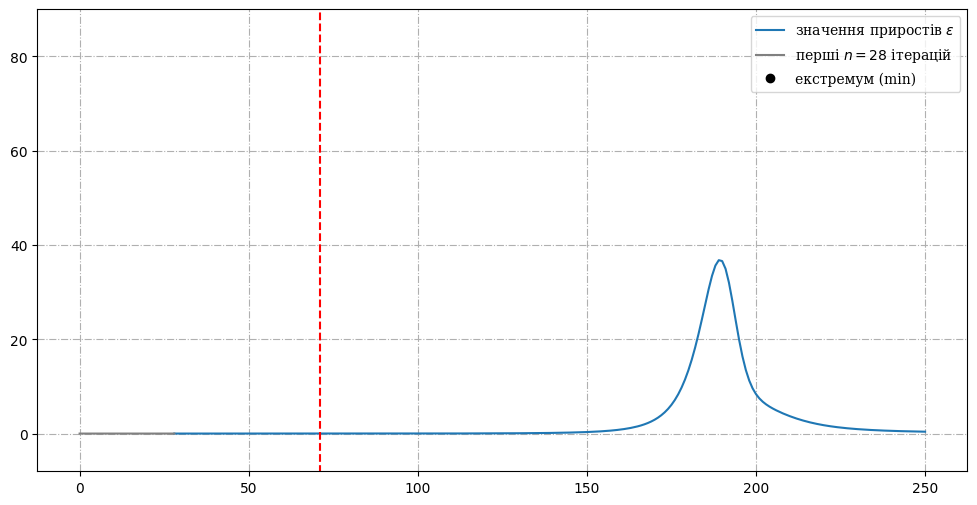

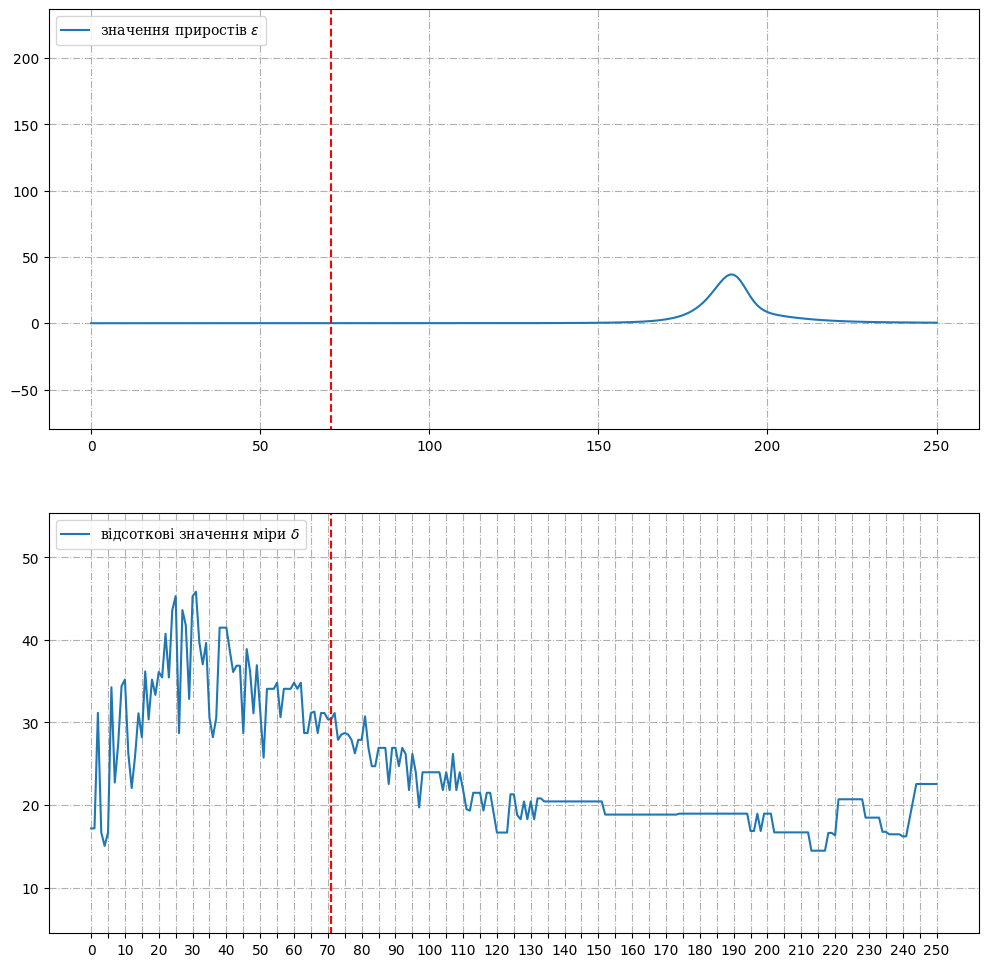

In [ ]:
for i in range(len(d)):
    if d[i] == 1:
        argmin = i
        break

print(len(epsilon), len(d))

mins = []
for i in range(len(epsilon)-2):
    if (i < argmin):
        if epsilon[i+1] < epsilon[i] and epsilon[i+2] > epsilon[i+1]:
            mins.append([i+1, epsilon[i+1]])

maxes = []
for i in range(len(epsilon)-2):
    if (i > argmin):
        if epsilon[i+1] > epsilon[i] and epsilon[i+2] < epsilon[i+1]:
            maxes.append([i+1, epsilon[i+1]])

print(f"mins: {mins}")
print(f"maxes: {maxes}")

font = {
    "family": "serif"
}

if states == 2: ylimits = [[-10, 250]]
if states == 3: ylimits = [[-8, 90]]
if states == 4: ylimits = [[-30, 400]]

for measures in ylimits:
    plt.figure(figsize=(12,6))

    marker = [chr(65+i) for i in range(len(mins))]
    point_number = 0
    for x,y in zip([mins[i][0] for i in range(len(mins))], [round(mins[i][1],2) for i in range(len(mins))]):

        label = f"{marker[point_number]} ({x};$\,${y})"

        if states == 2:
            plt.annotate(label, # this is the text
                (x,y), # these are the coordinates to position the label
                textcoords="offset points", # how to position the text
                xytext=(0,-8), # distance from text to points (x,y)
                ha='center', # horizontal alignment can be left, right or center
                va="top", # vertical alignment can be bottom, top or center
            )

        if states == 3:
            if x == 118:
                plt.annotate(label, # this is the text
                    (x,y), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(7,-8), # distance from text to points (x,y)
                    ha='center', # horizontal alignment can be left, right or center
                    va="top", # vertical alignment can be bottom, top or center
                )
            elif x == 140:
                plt.annotate(label, # this is the text
                    (x,y), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(0,-10), # distance from text to points (x,y)
                    ha='right', # horizontal alignment can be left, right or center
                    va="top", # vertical alignment can be bottom, top or center
                )
            else:
                plt.annotate(label, # this is the text
                    (x,y), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(0,-8), # distance from text to points (x,y)
                    ha='center', # horizontal alignment can be left, right or center
                    va="top", # vertical alignment can be bottom, top or center
                )

        if states == 4:
            plt.annotate(label, # this is the text
                (x,y), # these are the coordinates to position the label
                textcoords="offset points", # how to position the text
                xytext=(0,-8), # distance from text to points (x,y)
                ha='center', # horizontal alignment can be left, right or center
                va="top", # vertical alignment can be bottom, top or center
            )

        point_number += 1

    gray_iterations = 28

    plt.plot(
        [i for i in range(gray_iterations,len(epsilon[gray_iterations:])+gray_iterations)], 
        epsilon[gray_iterations:])
    plt.plot(
        [i for i in range(len(epsilon[:gray_iterations+1]))], 
        epsilon[:gray_iterations+1], color="gray")
    plt.plot(
        [mins[i][0] for i in range(len(mins))], 
        [mins[i][1] for i in range(len(mins))], 
        "o", color = "black")
    plt.plot(
        [argmin, argmin], 
        [-100, max(epsilon)+100], 
        "--", color="red")
    plt.ylim(measures)
    plt.legend(
        [r"значення приростів $\varepsilon$", f"перші $n={gray_iterations}$ ітерацій", "екстремум (min)"], 
        prop = font) # loc = "upper left"
    plt.grid(True, linestyle='-.')
    plt.show()

plt.figure(figsize=(12,12))

plt.subplot(2,1,1)
plt.plot([i for i in range(len(epsilon))], epsilon)
plt.plot([argmin, argmin], [-100, max(epsilon)+200], "--", color="red")
plt.ylim(-80, max(epsilon)+200)
# plt.title(r"a) значення приростів $\varepsilon$ від ітерації до ітерації", loc = "left", fontdict = font)
plt.legend([r"значення приростів $\varepsilon$"], prop = font, loc = "upper left") # loc = "upper left"
plt.grid(True, linestyle='-.')

plt.subplot(2,1,2)
plt.plot([i for i in range(len(d))], [d[i]*100 for i in range(len(d))])
plt.plot([argmin, argmin], [0, max(d)*100], "--", color="red")

grid_measure = 5

markers = ["" for i in range(len(d)//grid_measure + 1)]
for i in range(len(markers)):
    if i*grid_measure in [i*10 for i in range(len(d) // 10 + 1)]:
        markers[i] = i*grid_measure

plt.xticks(np.arange(0, len(d)+1, grid_measure), markers)
plt.plot([argmin, argmin], [0, max(d)*100+20], "--", color="red")
plt.ylim(min(d)*100-10, max(d)*100+9.5)
# plt.title(r"б) відсоткові значення міри $\delta$ від ітерації до ітерації", loc = "left", fontdict = font)
plt.legend([r"відсоткові значення міри $\delta$"], prop = font, loc = "upper left")
plt.grid(True, linestyle='-.')

plt.show()


251 251
mins: []
maxes: [[189, 36.78021985825035]]


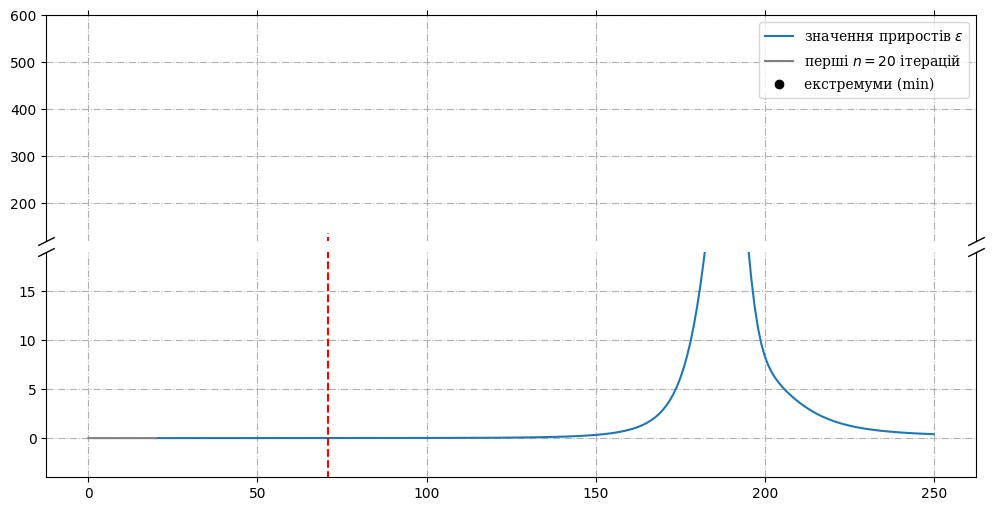

In [ ]:
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/broken_axis.html

for i in range(len(d)):
    if d[i] == 1.0:
        argmin = i
        break

print(len(epsilon), len(d))

mins = []
for i in range(len(epsilon)-2):
    if (i < argmin):
        if epsilon[i+1] < epsilon[i] and epsilon[i+2] > epsilon[i+1]:
            mins.append([i+1, epsilon[i+1]])

maxes = []
for i in range(len(epsilon)-2):
    if (i > argmin):
        if epsilon[i+1] > epsilon[i] and epsilon[i+2] < epsilon[i+1]:
            maxes.append([i+1, epsilon[i+1]])

print(f"mins: {mins}")
print(f"maxes: {maxes}")

font = {
    "family": "serif"
}

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,6))
fig.subplots_adjust(hspace=0.05)  # adjust space between axes

gray_iterations = 20

for ax in [ax1, ax2]:
    marker = [chr(65+i) for i in range(len(mins))]
    point_number = 0
    for x,y in zip([mins[i][0] for i in range(len(mins))], [round(mins[i][1],2) for i in range(len(mins))]):

        label = f"{marker[point_number]} ({x};$\,${y})"

        if x == 32: # B
            ax.annotate(label, # this is the text
                (x,y), # these are the coordinates to position the label
                textcoords="offset points", # how to position the text
                xytext=(0,5), # distance from text to points (x,y)
                ha='left', # horizontal alignment can be left, right or center
                va="bottom", # vertical alignment can be bottom, top or center
            )
        elif x == 37: # C
            ax.annotate(label, # this is the text
                (x,y), # these are the coordinates to position the label
                textcoords="offset points", # how to position the text
                xytext=(0,-4), # distance from text to points (x,y)
                ha='left', # horizontal alignment can be left, right or center
                va="top", # vertical alignment can be bottom, top or center
            )
        elif x == 50: # D
            ax.annotate(label, # this is the text
                (x,y), # these are the coordinates to position the label
                textcoords="offset points", # how to position the text
                xytext=(-28,-8), # distance from text to points (x,y)
                ha='center', # horizontal alignment can be left, right or center
                va="top", # vertical alignment can be bottom, top or center
            )
        elif x == 63: # E
            ax.annotate(label, # this is the text
                (x,y), # these are the coordinates to position the label
                textcoords="offset points", # how to position the text
                xytext=(-7,-8), # distance from text to points (x,y)
                ha='center', # horizontal alignment can be left, right or center
                va="top", # vertical alignment can be bottom, top or center
            )
        elif x == 79: # F
            ax.annotate(label, # this is the text
                (x,y), # these are the coordinates to position the label
                textcoords="offset points", # how to position the text
                xytext=(7,-8), # distance from text to points (x,y)
                ha='center', # horizontal alignment can be left, right or center
                va="top", # vertical alignment can be bottom, top or center
            )
        else: # A
            ax.annotate(label, # this is the text
                (x,y), # these are the coordinates to position the label
                textcoords="offset points", # how to position the text
                xytext=(0,-8), # distance from text to points (x,y)
                ha='center', # horizontal alignment can be left, right or center
                va="top", # vertical alignment can be bottom, top or center
            )

        point_number += 1

    ax.plot(
        [i for i in range(gray_iterations,len(epsilon[gray_iterations:])+gray_iterations)], 
        epsilon[gray_iterations:])
    ax.plot(
        [i for i in range(len(epsilon[:gray_iterations+1]))], 
        epsilon[:gray_iterations+1], color="gray")
    ax.plot(
        [mins[i][0] for i in range(len(mins))], 
        [mins[i][1] for i in range(len(mins))], 
        "o", color = "black")
    ax.plot(
        [argmin, argmin], 
        [-100, max(epsilon)+100], 
        "--", color="red")

    ax.grid(True, linestyle='-.')

ax1.legend(
    [r"значення приростів $\varepsilon$", f"перші $n={gray_iterations}$ ітерацій", "екстремуми (min)"], 
    prop = font) # loc = "upper left"

ax1.set_ylim(120, 600)
ax2.set_ylim(-4, 19)

ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

l = 0.5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -l), (1, l)], markersize=12,
            linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

plt.show()